## Tile Provider Maps

Bokeh plots can also consume XYZ tile services which use the Web Mercator projection. The module [bokeh.tile_providers](https://docs.bokeh.org/en/latest/docs/reference/tile_providers.html#bokeh-tile-providers) contains several pre-configured tile sources with appropriate attribution which can be added to a plot using the [add_tile()](https://docs.bokeh.org/en/latest/docs/reference/models/plots.html#bokeh.models.plots.Plot.add_tile) method.

### Supplier: [CartoDB](https://carto.com/blog/getting-to-know-positron-and-dark-matter/)

There doesn’t seem to be a day that goes by anymore without us seeing some far out data visualization using CartoDB

They will give your viewers geospatial context while they zoom around your maps. The maps come in two color themes so that you can make your data shine in any scenario. And we give you the ability to use either map with or without labels, helping you customize any map.

These maps are built using data from OpenStreetMap, which means that they are up-to-date with the latest data coming from mapping efforts around the world. It means that if you see pieces missing, you have the ability to update or edit those features directly from your browser.


Web Mercator, Google Web Mercator, Spherical Mercator, WGS 84 Web Mercator or WGS 84/Pseudo-Mercator is a variant of the Mercator projection and is the de facto standard for Web mapping applications. It rose to prominence when Google Maps adopted it in 2005.

In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.tile_providers import get_provider
from bokeh.tile_providers import Vendors
from bokeh.io import reset_output

reset_output()
output_notebook()

tile_provider = get_provider(Vendors.CARTODBPOSITRON_RETINA)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-20000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

show(p)

Notice also that passing x_axis_type="mercator" and y_axis_type="mercator" to figure generate axes with latitude and longitude labels, instead of raw Web Mercator coordinates.

Lmao to use Google Maps you need an [API Key](https://datantify.com/lab/nearplace/blog/how-to-generate-google-map-api-key-for-free/)...

If you're like me and are wary of google in general. Check these [out](https://datantify.com/lab/nearplace/blog/google-maps-api-alternatives/).

You can use google maps and the instructions can be found [here](https://docs.bokeh.org/en/latest/docs/user_guide/geo.html)

In [ ]:
for i in enumerate(Vendors):
    print(i)

In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.tile_providers import get_provider
from bokeh.tile_providers import Vendors

output_notebook()

tile_provider = get_provider(Vendors.STAMEN_TERRAIN_RETINA)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-20000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

show(p)

### GeoJSON Data

GeoJSON is a popular open standard for representing geographical features with JSON. It describes points, lines, and polygons (called Patches in Bokeh) as a collection of features. Each feature can also have a set of properties.

Bokeh’s GeoJSONDataSource can be used almost seamlessly in place of Bokeh’s ColumnDataSource

In [ ]:
import json

from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson

output_notebook()

data = json.loads(geojson)


data = json.loads(geojson)
for i in range(len(data['features'])):
    data['features'][i]['properties']['Color'] = ['blue', 'red'][i%2]

geo_source = GeoJSONDataSource(geojson=json.dumps(data))

TOOLTIPS = [
    ('Organisation', '@OrganisationName')
]

p = figure(background_fill_color="lightgrey", tooltips=TOOLTIPS)
p.circle(x='x', y='y', size=15, color='Color', alpha=0.7, source=geo_source)

show(p)


## Walkthrough: Mapping Basics with Bokeh and GeoPandas in Python 

From data and files to a static map to an interactive map

Geopandas is an open source package that helps users work with geospatial data. GeoPandas has a number of dependencies. One of those dependencies is shapely, and it is on this library that Geopandas relies for performing geometric operations. In our case the shape of each state will be encoded as a polygon or multipolygon via the shapely package. Then used through Geopandas to understandd the geospatial data

Goal 1: Create a mpa of the contiguous US that shows the state population. Within each state, show where lead was found in 2018. 

In order to create a map, you will need a shapefile (.shp). In this case, download a shapefile from the US Census Bureau.

For a variety of shapefiles look [here](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html)

In [1]:
import pandas as pd
import numpy as np
import re 
import geopandas as gpd
import pandas as pd
import json

In [2]:
contiguous_usa = gpd.read_file('map_data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
urban_areas_usa = gpd.read_file('map_data/cb_2018_us_ua10_500k/cb_2018_us_ua10_500k.shp')

# Remove Alaska and Hawaii
contiguous_usa= contiguous_usa.loc[~contiguous_usa['NAME'].isin(['Alaska', 'Hawaii'])]

Each state has a corresponding geometry which can be visualized as above.

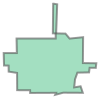

In [3]:
urban_areas_usa.iloc[1]['geometry']

### Let's Load the Budget Dataset

In [4]:
filepath= 'data/demographics/budgets.csv'
budgets_df = pd.read_csv(filepath)

def convert_name(name):
    nm_list = name.split(':')[::-1]
    return ', '.join(nm_list).strip()
    
budgets_df['city_merge_name'] = budgets_df['city_name'].apply(convert_name)
budgets_df['state'] = budgets_df['city_name'].apply(lambda name:name.split(":")[0])
budgets_df[budgets_df.year==2017]

year             city_name      id_city  city_population  cpi  \
40    2017         AK: Anchorage   22002001.0           297216  1.0   
81    2017         AK: Fairbanks   22006001.0            32015  1.0   
122   2017        AL: Birmingham   12037003.0           211436  1.0   
163   2017            AL: Mobile   12049004.0           191885  1.0   
204   2017        AL: Montgomery   12051001.0           200360  1.0   
245   2017         AR: Ft. Smith   42066003.0            87615  1.0   
286   2017       AR: Little Rock   42060004.0           198673  1.0   
327   2017              AZ: Mesa   32007008.0           491041  1.0   
368   2017           AZ: Phoenix   32007010.0          1613581  1.0   
409   2017            AZ: Tucson   32010002.0           537831  1.0   
450   2017    Average for Cities          NaN           459105  NaN   
491   2017           CA: Anaheim   52030001.0           350848  1.0   
532   2017       CA: Bakersfield   52015001.0           375844  1.0   
573   2017           CA: Fremont   52001005.0           233378  1.0   
614   2017            CA: Fresno   52010005.0           521986  1.0   
655   2017  CA: Huntington Beach   52030009.0           200541  1.0   
696   2017        CA: Long Beach   52019026.0           469435  1.0   
737   2017       CA: Los Angeles   52019027.0          3969262  1.0   
778   2017           CA: Modesto   52050002.0           211334  1.0   
819   2017           CA: Oakland   52001009.0           420798  1.0   
860   2017         CA: Riverside   52033012.0           323877  1.0   
901   2017        CA: Sacramento   52034005.0           494324  1.0   
942   2017         CA: San Diego   52037010.0          1403865  1.0   
983   2017     CA: San Francisco   52038001.0           872795  1.0   
1024  2017          CA: San Jose   52043012.0          1030359  1.0   
1065  2017         CA: Santa Ana   52030016.0           334175  1.0   
1106  2017          CA: Stockton   52039004.0           306407  1.0   
1147  2017            CO: Aurora   62003501.0           362941  1.0   
1188  2017  CO: Colorado Springs   62021002.0           458531  1.0   
1229  2017            CO: Denver   62016001.0           696618  1.0   
...    ...                   ...          ...              ...  ...   
5042  2017         TN: Knoxville  432047001.0           185193  1.0   
5083  2017           TN: Memphis  432079005.0           653184  1.0   
5124  2017         TN: Nashville  432019003.0           687430  1.0   
5165  2017         TX: Arlington  442220001.0           394780  1.0   
5206  2017            TX: Austin  442227001.0           939768  1.0   
5247  2017    TX: Corpus Christi  442178003.0           325947  1.0   
5288  2017            TX: Dallas  442057007.0          1324477  1.0   
5329  2017           TX: El Paso  442071002.0           681485  1.0   
5370  2017         TX: Ft. Worth  442220011.0           856902  1.0   
5411  2017           TX: Garland  442057012.0           236500  1.0   
5452  2017           TX: Houston  442101008.0          2309752  1.0   
5493  2017           TX: Lubbock  442152002.0           251086  1.0   
5534  2017       TX: San Antonio  442015010.0          1488512  1.0   
5575  2017             UT: Provo  452025011.0           116573  1.0   
5616  2017    UT: Salt Lake City  452018005.0           194182  1.0   
5657  2017        VA: Chesapeake  472105701.0           237591  1.0   
5698  2017           VA: Norfolk  472122001.0           245843  1.0   
5739  2017          VA: Richmond  472127001.0           225332  1.0   
5780  2017    VA: Virginia Beach  472132001.0           451136  1.0   
5821  2017        VT: Burlington  462004001.0            42303  1.0   
5862  2017           VT: Rutland  462011004.0            15531  1.0   
5903  2017           WA: Seattle  482017021.0           710510  1.0   
5944  2017           WA: Spokane  482032010.0           214990  1.0   
5985  2017            WA: Tacoma  482027016.0           210268  1.0   
6026  2017           WI: Madis

In [5]:
merged_df = urban_areas_usa.merge(budgets_df[budgets_df.year==2017],left_on='NAME10',right_on = 'city_merge_name',how='left').dropna()

Now that we have merged the data and limited it to the contiguous USA, we can convert the data to a format that is conducive to mapping

In [13]:
import json
from bokeh.io import show, output_notebook,output_file
from bokeh.resources import INLINE
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

In [10]:
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = merged_df.to_json())
geosource2 = GeoJSONDataSource(geojson = contiguous_usa.to_json())

In [20]:
output_file('plot.html')
p = figure(title = 'Urban Areas and Budgets', y_range=(20, 50),x_range=(-126, -66),
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.

states = p.patches('xs','ys', source = geosource2,
                   fill_color = None,
                   line_color = 'gray', 
                   line_width = 0.15, 
                   fill_alpha = 1)

areas = p.patches('xs','ys', source = geosource)
#                   fill_color = None,
#                   line_color = 'gray', 
#                   line_width = 0.25, 
#                   fill_alpha = 1)

p.add_tools(HoverTool(renderers = [areas],
                      tooltips = [('City','@NAME10'),
                                ('Revenue','@rev_total')]))
show(p)